# 🧠 MNIST Dataset Loading with TensorFlow

This snippet demonstrates how to load the MNIST handwritten digits dataset using TensorFlow's built-in Keras API. It also sets up necessary imports, defines class labels, and applies a dark theme for future visualizations.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from matplotlib import style
style.use("dark_background")

# Download the data
df = tf.keras.datasets.mnist
(train_images, train_labels) , (test_images , test_labels) = df.load_data()

class_names = ['0','1','2','3','4','5','6','7','8','9']

# 📊 Normalizing MNIST Image Data

This code normalizes the pixel values of the MNIST images along axis 1 (per row), scaling them to a range between 0 and 1. Normalization helps improve model performance and training stability by ensuring consistent input data.


In [2]:
train_images = tf.keras.utils.normalize(train_images, axis= 1)
test_images = tf.keras.utils.normalize(test_images, axis= 1)

# 🏗️ Building a Neural Network for Digit Classification

This snippet constructs a sequential neural network model using Keras. The model flattens the 28x28 MNIST images, passes them through two hidden dense layers with ReLU activation, and outputs predictions across 10 digit classes using a softmax layer. The `model.summary()` call displays the model architecture and parameter count.


In [3]:
# Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\nufal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# ⚙️ Compiling, Training, and Evaluating the Model

The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss, suitable for multi-class classification with integer labels. It is then trained on the normalized MNIST dataset for 10 epochs, and its performance is evaluated on the test set, reporting the final test accuracy.


In [4]:
# Compiling the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_images,train_labels, epochs=10)
history.history.keys()
# Testing the model
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8649 - loss: 0.4799
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1090
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0703
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9846 - loss: 0.0507
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0378
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0276
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9925 - loss: 0.0234
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0182
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9949 - loss: 0.0155
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9953 - loss: 0.0139
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9694 - loss: 0.1335
Test accuracy: 0.9732999801635742


# 🔍 Making Predictions and Visualizing Results

This snippet allows the user to input an index to inspect a specific test image. The model predicts the digit, and the result is compared to the actual label. It also visualizes:
- The selected image with predicted and actual labels,
- The model's training accuracy over epochs,
- The model's training loss over epochs.

These plots help assess both individual prediction quality and overall training performance.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
1


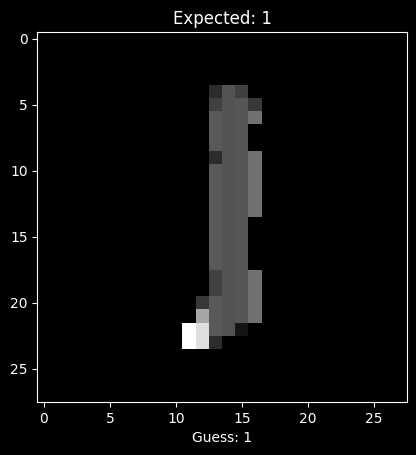

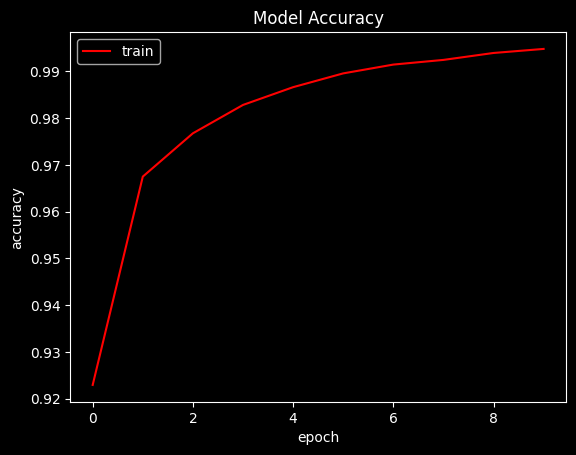

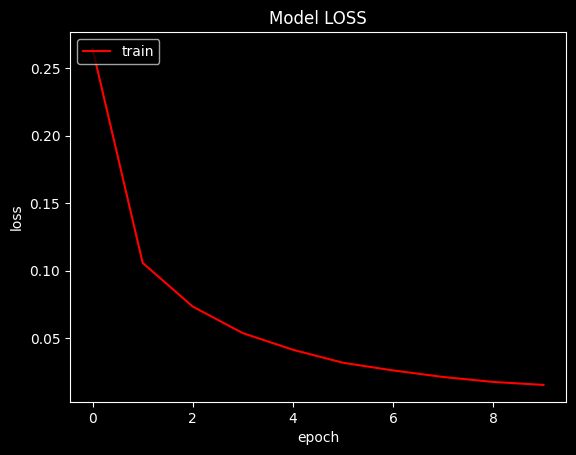

In [5]:
pred = int(input("Choose a number honey : "))
label = str(class_names[test_labels[pred]])
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[pred])])
guess = class_names[np.argmax(predictions[pred])]

# PREDECTION
plt.figure(1)
plt.imshow(test_images[pred] , cmap='gray')
plt.title("Expected: " + label)
plt.xlabel("Guess: " + guess)
plt.grid(False)

# LOSS AND ACCURACY
plt.figure(2)
plt.plot(history.history['accuracy'] , color='red')
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train'], loc='upper left')

plt.figure(3)
plt.plot(history.history['loss'],  color='red')
plt.title("Model LOSS")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train'], loc='upper left')
plt.show()